In [17]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

 # 1. Dataset

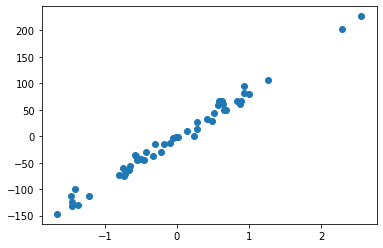

In [18]:
x, y = make_regression(n_samples= 50, n_features=1, noise=10)
plt.scatter(x,y)

In [19]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(50, 1)
(50, 1)


In [20]:
# matrix x
X = np.hstack((x,np.ones(x.shape)))
X

array([[-0.55070292,  1.        ],
       [ 0.57981013,  1.        ],
       [-0.65144911,  1.        ],
       [-0.72751935,  1.        ],
       [ 0.01841394,  1.        ],
       [-1.42049444,  1.        ],
       [-0.7442465 ,  1.        ],
       [-0.0506697 ,  1.        ],
       [-1.46122772,  1.        ],
       [-1.66758501,  1.        ],
       [-1.2152405 ,  1.        ],
       [ 2.55883117,  1.        ],
       [ 0.63522853,  1.        ],
       [-0.57891075,  1.        ],
       [-0.17801999,  1.        ],
       [ 1.26543438,  1.        ],
       [ 0.99841261,  1.        ],
       [ 0.13412168,  1.        ],
       [-0.57354362,  1.        ],
       [ 0.56455774,  1.        ],
       [ 0.89454162,  1.        ],
       [ 2.29134254,  1.        ],
       [-0.80955184,  1.        ],
       [ 0.68647872,  1.        ],
       [ 0.51724626,  1.        ],
       [ 0.4190855 ,  1.        ],
       [-1.4595544 ,  1.        ],
       [-0.01122805,  1.        ],
       [-0.66113156,

In [21]:
# random initialization of vector theta
theta = np.random.randn(2,1)
print(theta.shape)
print(theta)

(2, 1)
[[ 1.46439115]
 [-1.60781638]]


# 2. Model

In [22]:
def model(X, theta):
    return X.dot(theta)

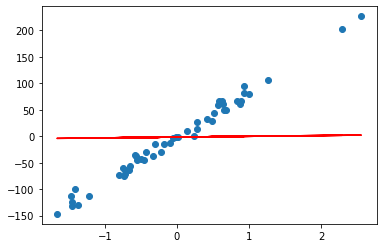

In [23]:
# compare initial model with data
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

# 3. Cost function

In [24]:
def cost_function(X, y, theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [25]:
cost_function(X, y, theta)

3037.9727097505

# 4. Gradient and Gradient descent

In [26]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [27]:
def gradient_descent(X, y, theta, learning_rate, n_it):
    cost_history = np.zeros(n_it)
    for i in range(0, n_it):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Fit the model

In [28]:
theta_final, cost_hist = gradient_descent(X, y, theta, learning_rate=0.01, n_it=500)
theta_final

array([[84.86962015],
       [-0.64572157]])

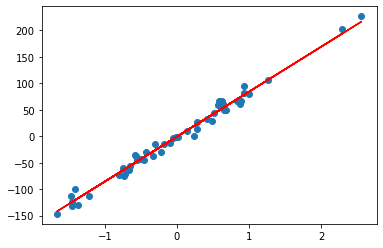

In [29]:
# compare fit model with data
predictions = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

# 6. Learning curve

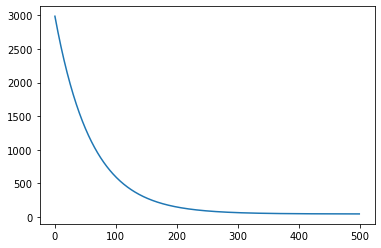

In [30]:
plt.plot(range(500), cost_hist)

# 7. R²

In [31]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [32]:
coef_determination(y, predictions)

0.9862181936292864